## The Titanic

#### The aim of this project is to build a predictive model that analyses the sort of people thet were more likely to survice the Titanic, using the data of the passengers.

#### We have the datasets in test.csv and train.csv. I will use the train.csv to train the model and test the model on test data

### 1.1  Import all the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score,f1_score,recall_score,precision_recall_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the test and train data

In [3]:
train_data = pd.read_csv('./Datasets/titanic_train.csv')
test_data = pd.read_csv('./Datasets/titanic_test.csv')

### 1.3 Display the first 5 rows of the train datasets

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.3.1 Display the first 5 rows of the test datasets

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1.4 Display the short summary of the Dataframe

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.5 See the Dataframe Description

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Observations**
- There are 3 passenger classes. there were more people is class 3 (about 50%) than any other class. About 25% were in class 2
- The average age of the passengers was 30 years old.
- The average fare is about 32.2 with the maximum fare of 512 Some fares has zero values. We need to check if these are null values

### 1.6 Checking the shape of the Dataframe

In [9]:
train_data.shape

(891, 12)

##### 1.6.1 Let us see the unique values of the dataset

In [10]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- The categorical variables are Embarked, SibSp,Parch, Pclass and the target variable Survived
- Others are numerical valriables
- We remove PassengerID and Name because it is redundant and has no value to the model 

#### The Dataframe has 891 rows and 12 columns

### 1.6 Checking the columns of the Dataframe

In [11]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Count the data types in the dataframe

In [12]:
train_data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

The dataset has 5 of its features to be integer data type, 5 of String/object data type and 2 of float data types

### 1.9 Check out null values

In [13]:
def null_values(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    count_null = df.isnull().count().sort_values(ascending = False)
    percent_null = total_null/count_null
    total = pd.concat([total_null,percent_null], axis = 1, keys=['Total','Percent'])
    return total

In [14]:
null_values(train_data)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#### The columns with the most null values are Cabin and Age

In [15]:
train_data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [16]:
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [17]:
train_data[train_data['Fare']==0]['PassengerId'].count()

15

There are about 15 passengers with Zero fares. About 12 of these passengers dont have cabins as well. We will treat them as null values and work on them

## 2. Exploratory Analysis of the Data

In [18]:
### 2.1 Let us see the age distribution of the people on Titanic

In [19]:
# Defining the hist_box() function
def hist_box(data,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
      # Adding a graph in each part
    sns.boxplot(data[col], ax=ax_box, showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    plt.show()

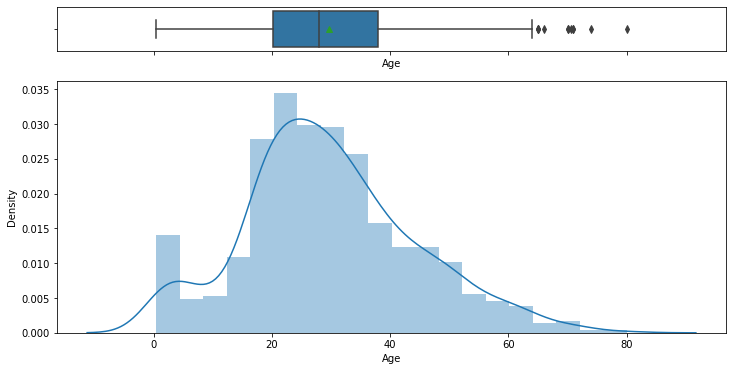

In [20]:
hist_box(train_data,'Age')

The Age Distribution is almost normally distributed. Most of the passenger were between 20 and 40 years old with an average of about 29 years old. The distribution is a little right skewed

In [21]:
train_data['Age'].skew()

0.38910778230082704

### 2.1 Let us explore the data for Age and Survived

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

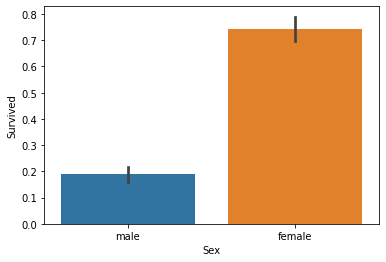

In [22]:
sns.barplot(data = train_data, x = 'Sex', y = 'Survived')

#### 2.1.1 Let us see the percentage of ratio of people that survived to those that did not

In [23]:
train_data['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

About 38% of the passengers survived

#### 2.1.2 Percentage of Embarked

In [24]:
train_data['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

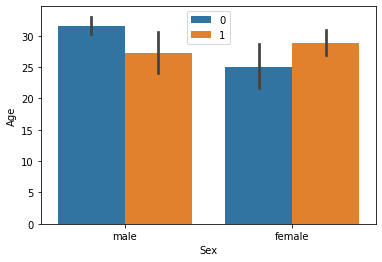

In [25]:
sns.barplot(data = train_data, x = 'Sex', y = 'Age', hue = 'Survived')
plt.legend()

In [26]:
### 2.2 Pair the features with pairplot

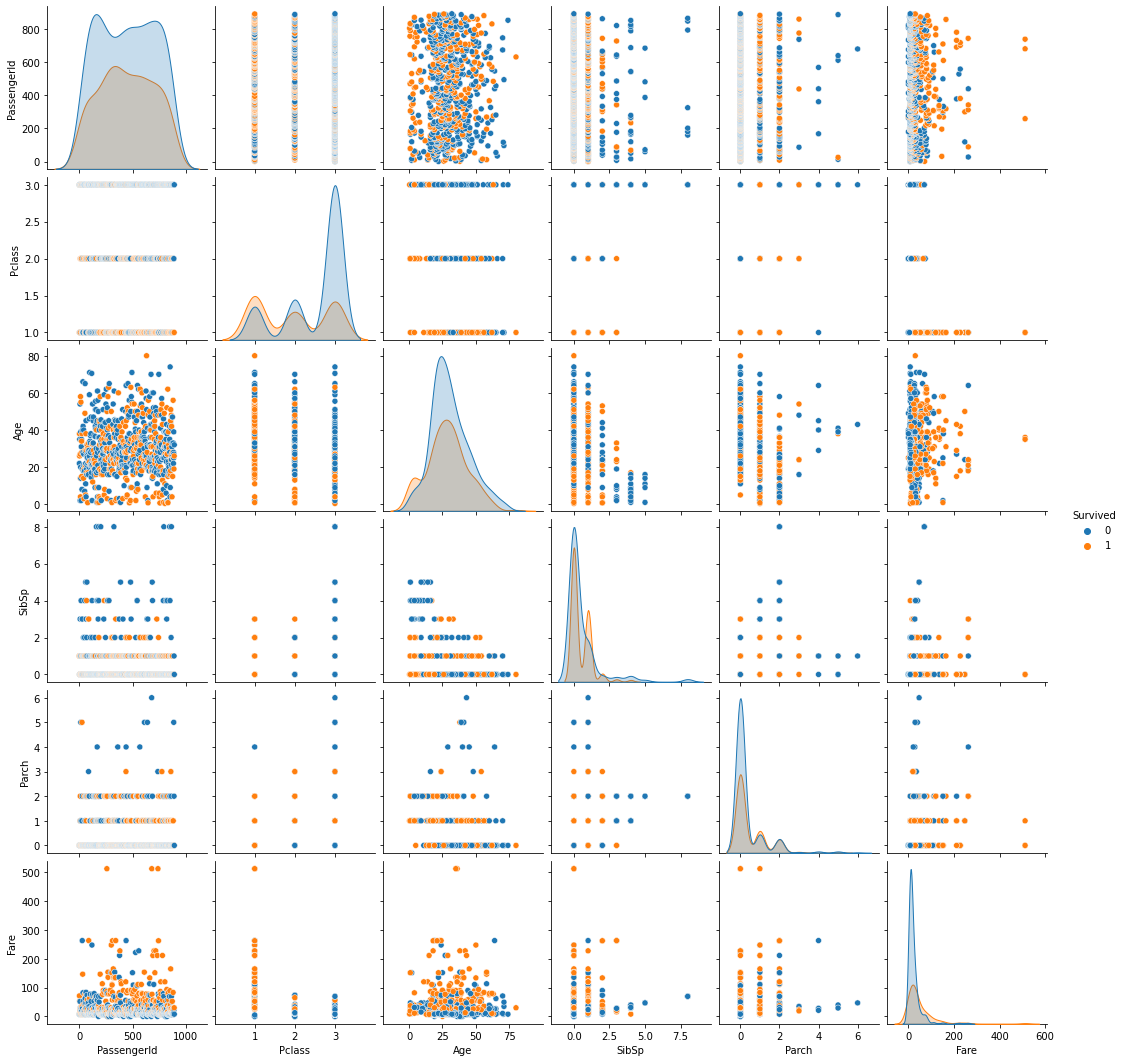

In [27]:
sns.pairplot(train_data, hue = 'Survived')

#### **Observations**
- Younger males survived more than the older males whilst the older females survived more that the younger females
- There were more female survivals than male
- Older females survivals were more than older male survivals.

#### 2.3 Let us see the correlation amongst the features

<AxesSubplot:>

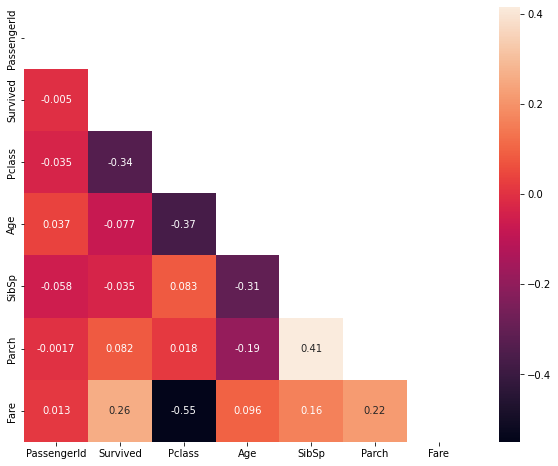

In [28]:
plt.figure(figsize = (10,8))
matrix = np.triu(train_data.corr())
sns.heatmap(train_data.corr(), annot=True, mask = matrix)

#### Observation: There is no significant correlation amongest the features

## 3. Clean the Datasets (both train and test data)
Here are some cleanings to be done.
* On the train dataset, Survived column is our dependent variable (Y) while other columns are independent variable (X)
* We will drop Cabin, fill the null values of Embarked column with 'ffill' and fill the null values of Age column with its median
* We replace the calues of Sex column with 1 for Male and 2 for female.
* We replace the values of Embarked column with 1 for 'S', 2 for 'C' and 3 for 'Q'

#### 3.1 Drop Cabin, Ticket,PassengerId  and Name columns on both datasets

In [29]:
train_data.drop(['Cabin','Ticket','Name','PassengerId'], axis = 1, inplace = True)
test_data.drop(['Cabin','Ticket','Name','PassengerId'], axis = 1, inplace = True)

- **Replacing Male with 1 and Female with 2 for Sex**
- **Replacing the values of Embarked column with 1 for 'S', 2 for 'C' and 3 for 'Q'** 

In [30]:
train_data['Embarked'].replace({'S':1,'C':2,'Q':3}, inplace=True)
test_data['Embarked'].replace({'S':1,'C':2,'Q':3}, inplace=True)

In [31]:
train_data['Sex'].replace({'male':1,'female':2}, inplace  = True)

In [32]:
test_data['Sex'].replace({'male':1,'female':2}, inplace  = True)

#### Fill the missing values in Embarked with the median with is 1

In [33]:
train_median = train_data['Embarked'].median()
test_median = train_data['Embarked'].median()

In [34]:
train_data['Embarked'].fillna(train_median, inplace = True)

In [35]:
test_data['Embarked'].fillna(train_median, inplace = True)

##### Perform One-Hot encoding on Embarked and Sex variables

In [36]:
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'], drop_first=True)

In [37]:
test_data = pd.get_dummies(test_data, columns=['Sex','Embarked'], drop_first=True)

In [38]:
median_age_train = train_data.Age.median()
median_age_test = test_data.Age.median()
train_data['Age'].fillna(median_age_train, inplace = True)
test_data['Age'].fillna(median_age_test, inplace = True)

### 3.4 Check the head of the datasets

In [39]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_2,Embarked_2.0,Embarked_3.0
0,0,3,22.0,1,0,7.2500,0,0,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,35.0,0,0,8.0500,0,0,0


In [40]:
train_data.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_2           0
Embarked_2.0    0
Embarked_3.0    0
dtype: int64

In [41]:
test_data.fillna(method = 'ffill', inplace = True)

## 4.  Dependent and independent variables
* Split the train data into dependent variable and independent variable. 
* Survived is the dependent variable Y, Other columns are the independent variable X

In [42]:
Y = train_data['Survived']
X = train_data.drop('Survived', axis = 1)

### 5. Split the train data with train_test_split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 8), (179, 8), (712,), (179,))

## 6. Create the models



### Decision Tree

In [46]:
dr = DecisionTreeClassifier()

In [47]:
dr_fit_train = dr.fit(X_train,y_train)

In [48]:
dr_pred = dr.predict(X_train)

In [49]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



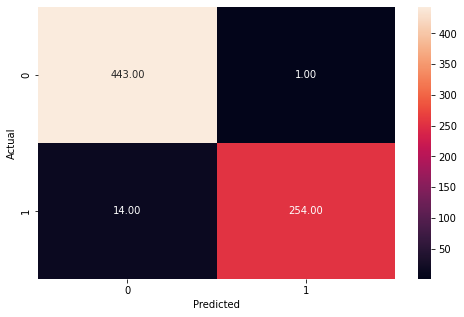

In [50]:
metrics_score(y_train,dr_pred)

The model performed well on the train dataset with accuracy of 98% and a recall of 95%%

Check the model of validation data

In [51]:
y_pred_val = dr.predict(X_val)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



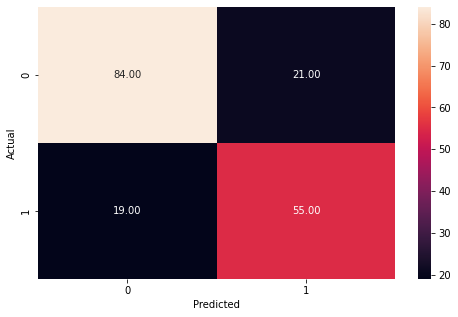

In [52]:
metrics_score(y_val, y_pred_val)

- The performance of the model dropped on the test data. This means the model seem to overfit on the training data.
- The recall dropped from 95% to 74% 
- The accuracy also dropped to 78%
- Let us tune the parameter to see if the perfomance of the model will improve.

#### Perform hyperparameter tuning for the decision tree model using GridSearch CV

In [53]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       444
           1       0.91      0.80      0.85       268

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



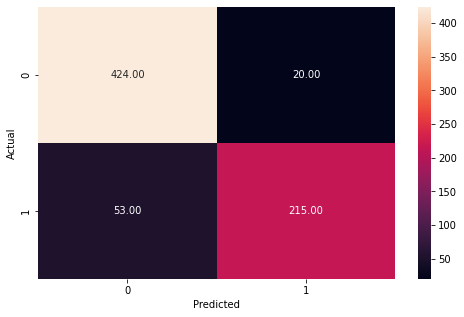

In [54]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

- When the model is tuned, the model perfomance improved with an increase of 6% on recall (74% to 80%)
- Accuracy increase from 78% to 90%
- Let us check the performance on the validation data

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



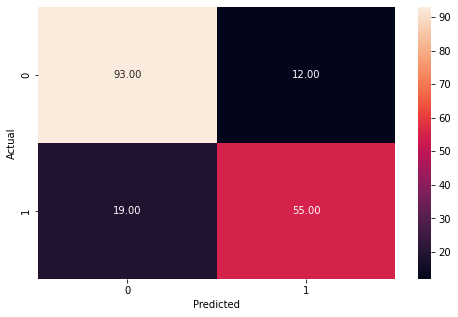

In [55]:
# Checking performance on the validation dataset
dt_tuned = estimator.predict(X_val)
metrics_score(y_val,dt_tuned)

- There is not change on the model performance on the validation data for the recall. The recall remains 74%
- The accuracy increased from 78% to 83%
- The precision improved significantly from 72% to 82%
- The model is not overfitting

In [56]:
from sklearn import tree

##### Visualize the tree

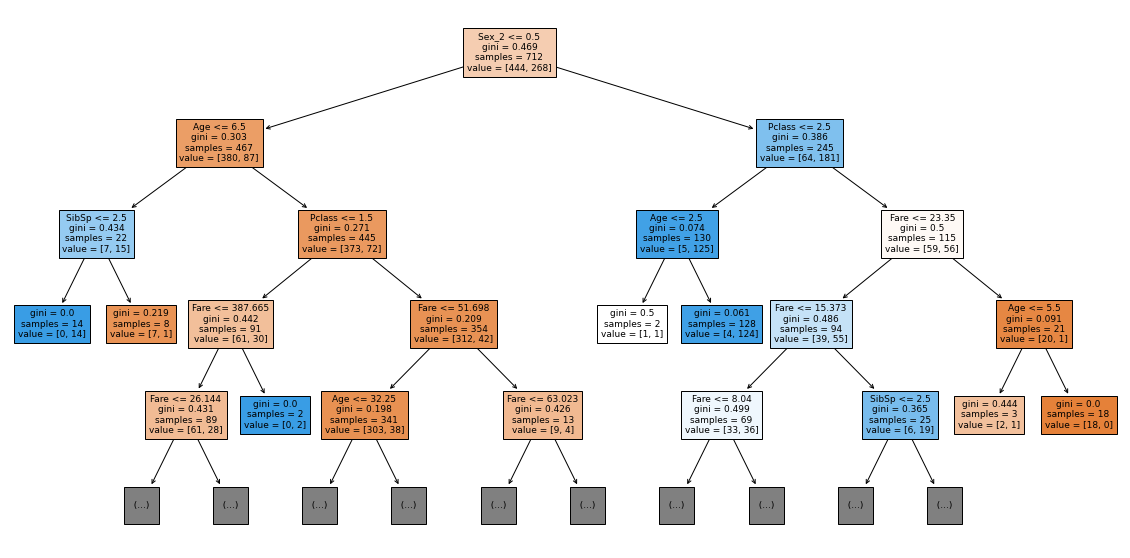

In [57]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Import festures based on tuned Decision Tree

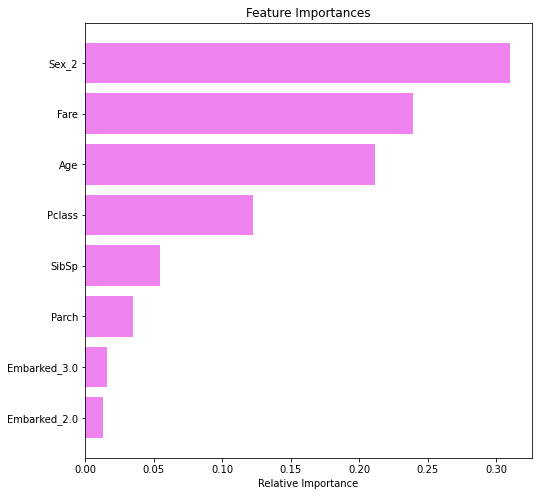

In [58]:
# Importance of features in the tree building
importances = dr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Random Forest Classifier

In [59]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Check the model performance on train dataet

In [60]:
y_pred_train = rf_estimator.predict(X_train)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.99      0.96      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



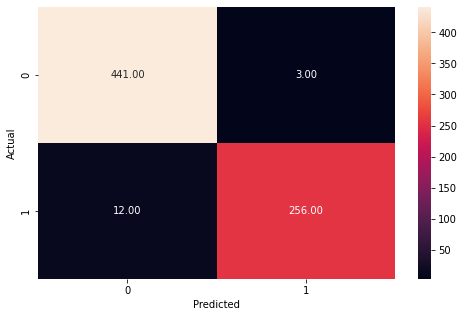

In [61]:
metrics_score(y_train, y_pred_train)

The model performed well on the training data set with accuracy of 98% and a recall score of 99%

#### Check the model performance of test data

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



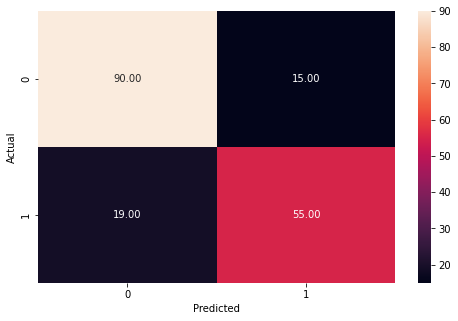

In [62]:
y_pred_test = rf_estimator.predict(X_val)
metrics_score(y_val, y_pred_test)

- Model underperform on the test data with accuracy of 81% and recall of 86%. The model seem to overfit the training data set. 
- We tune the parameter to see if the performance of the model will improve and also reduce overfitting.


#### Let us check the feature importance of Random Forest

<AxesSubplot:xlabel='Importance'>

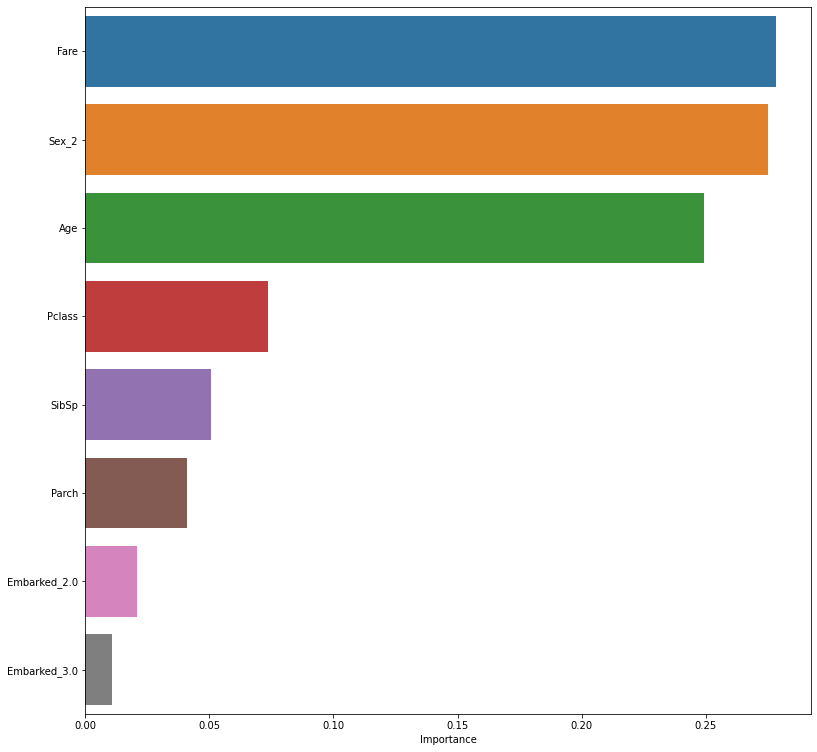

In [63]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances,index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

The random forest model confirms the features that are importance by Decision tree which are the Gender, Fare and Age

### Logistics Regression

In [65]:
lr_model = LogisticRegression(random_state=1)

In [66]:
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [67]:
y_pred = lr_model.predict(X_train)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       468
           1       0.69      0.76      0.72       244

    accuracy                           0.80       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.81      0.80      0.80       712



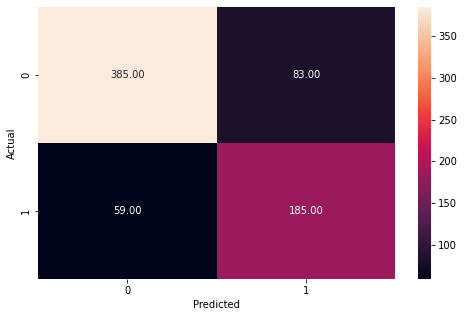

In [68]:
metrics_score(y_pred, y_train)

##### Check the model performance on validation data 

In [70]:
y_pred_test = lr_model.predict(X_val)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



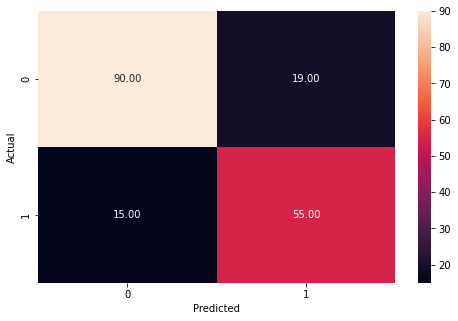

In [71]:
metrics_score(y_pred_test, y_val)

- The model performance is generalized with accuracy of 80% on train data and 81% on validation data. 
- The recall is 76% on train data and 79% on test data
- Let us utlized the optimal threhold to tune the parameters of the model and check if the model performance improves

Let's use the Precision-Recall curve and see if we can find a better threshold.

In [72]:
y_scores = lr_model.predict_proba(X_train)

In [73]:
precisions_lr,recall_lr,threshold_lr=precision_recall_curve(y_train,y_scores[:,1])

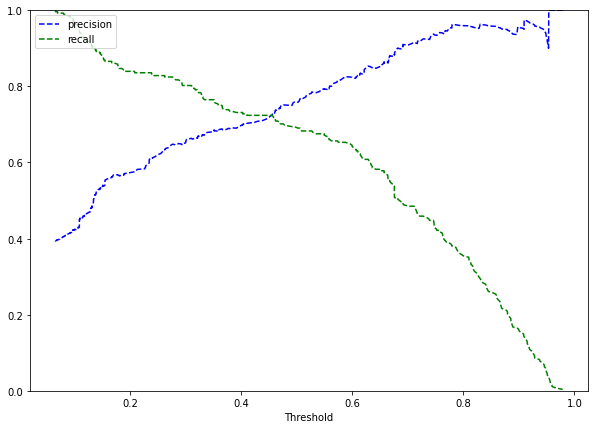

In [74]:
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(threshold_lr, precisions_lr[:-1], 'b--', label='precision')
plt.plot(threshold_lr, recall_lr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

##### Observation
- Precision and recall are balanced at a threshold of 0.46

In [75]:
optimal_threshold = 0.46

Check the model performance of Training Data

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       444
           1       0.73      0.71      0.72       268

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



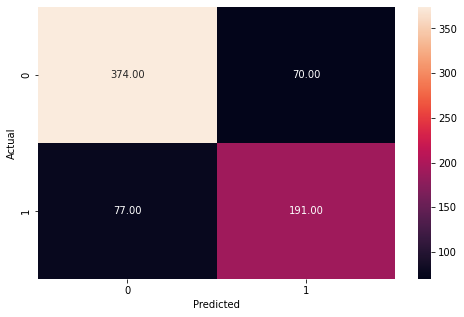

In [76]:
y_pred = lr_model.predict_proba(X_train)
metrics_score(y_train,y_pred[:,1]>optimal_threshold)

- The recall improved compared with the model when not tuned. although the accuracy reduced by 1%
- Let us check the model performance with the optimal threhold on the validation data

Checking the model performance on validation data

In [78]:
y_pred_test = lr_model.predict_proba(X_val)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



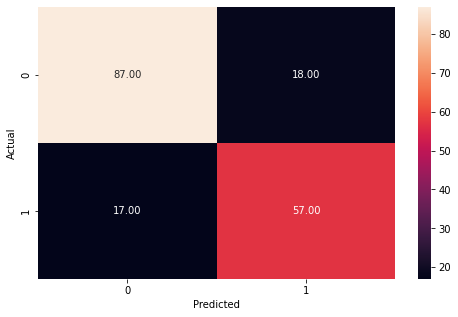

In [79]:
metrics_score(y_val, y_pred_test[:,1]>optimal_threshold)

- There is no significant improvement on the model when the optimal threhold is utlilised to tune the model
- On the test data, the tuned Random Forest model performed better than the Logistics Regression model

- The model performed better without the optimal threshold

### Support Vector Machine (SVM) Model

To speed up the model, we scale the data

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_val)


SVM with Linear kernel

In [97]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

In [98]:
y_pred = model.predict(X_train_scaled)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



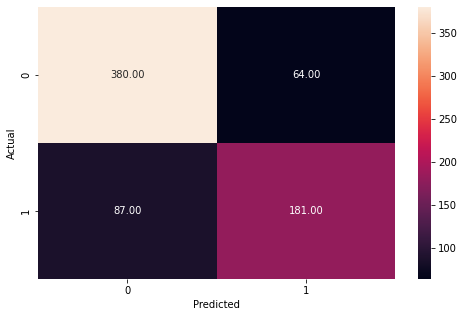

In [99]:
metrics_score(y_train,y_pred)

**Observations**
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the hotel booking at the risk of cancellation.

The recall is 68% wth an accuracy of 79%. This means the model is not overfitting

Checking on validation data

In [100]:
y_pred_test = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



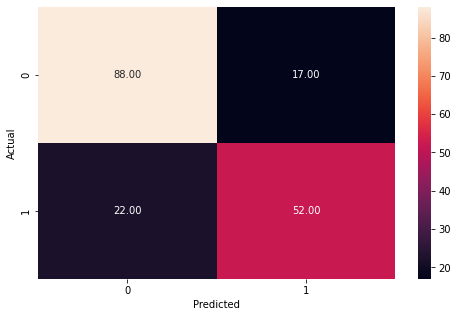

In [101]:
metrics_score(y_val, y_pred_test)

- The performance of the model is generalized, withe a recall of 70% and accuracy of 73%.
- The model is not overfitting

**Observation**
-The model with the best model performance is the decision tree with recall of 0.80 and accuracy of 0.90 on validation data

**Recommendation**
- The fare was the a mojor contributor to the survival of the people on board. The people that paid higher survived more than those that paid lower.
- The gender also contribute immensely as there were more female survival than male. This may means women were assisted more during rescue than male
- The younger people also survived more as age is an important factor here.

Checking the Decision Tree performance on test data

In [117]:
dr_model = DecisionTreeClassifier(random_state=1)

In [118]:
submission = pd.read_csv('./Datasets/gender_submission.csv')

In [119]:
submission['Survived'] = dr_model.fit(X_train,y_train).predict(test_data)

In [120]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [121]:
#submission.to_csv('submissiondt.csv', index=False, index_label=False)